#Introduction to regression with Neural Network in Tensorflow

In [1]:
#Import Tensorflow
import tensorflow as tf

###Creating Data to View and Fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

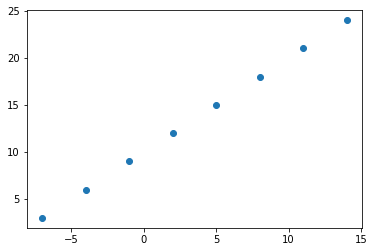

In [4]:
plt.scatter(X, y)

In [5]:
# Turning numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss= tf.keras.losses.mae, # mean absolute error
              optimizer= tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5, verbose=0) # train for 5 laps ( 5 opportunities to pass over the data)

In [7]:
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

##Improve Our Model

We improve the model by altering the steps taken to create a model

1. **Create a model** - to improve this we can add more hidden layers, increase the number of hidden units ( neurons ) within each of the hidden layer, and change the activation function of each layer.

2. **Compiling a Model** - to improve at this step we might change the optimization function or the *learning rate* of the optimization function.

3. **Fitting a Model** - fit the model for more epochs ( leave it training for longer time ) or on more data ( give the model more examples to learn from )

In [8]:
# Let's rebuild our model

# Create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden layer and the number 1 in () is 1 hidden neuron in those layers
])

# Compile a model
model2.compile(loss= tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.SGD(),
               metrics=['mae'])

# Fit the model

model2.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose=0)

In [9]:
model2.predict([17.0])

array([[29.739855]], dtype=float32)

In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Let's rebuild our model

# Create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
])

# Compile a model
model2.compile(loss= tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.SGD(),
               metrics=['mae'])

# Fit the model

model2.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose=0)

In [12]:
#Improving the model

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(1)
])

# compile the model
model3.compile(loss = tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"]
               )

#fit the model
model3.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
model3.predict([17])

array([[26.18506]], dtype=float32)

In [15]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

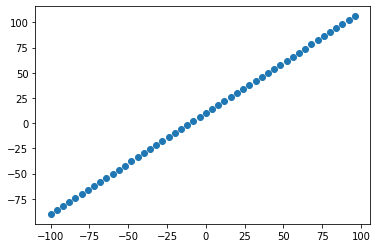

In [17]:
plt.scatter(X, y)

In [18]:
# split the data into train set and test set

X_train = X[:40] 
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

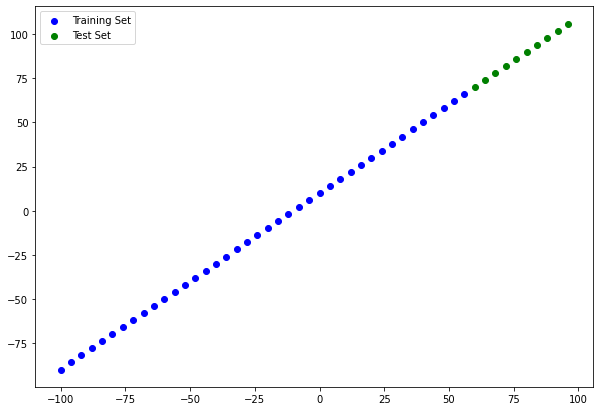

In [19]:
#Visualizing our data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label="Training Set")
plt.scatter(X_test, y_test, c = 'g', label="Test Set")
plt.legend()

In [20]:
# create a model

model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

# compile model

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# fit the model
model4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [21]:

tf.random.set_seed(42)

# create another model
model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# compile the model

model5.compile(loss=tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.SGD(),
               metrics=['mae'])

In [22]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [23]:
model5.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [24]:
from tensorflow.keras.utils import plot_model

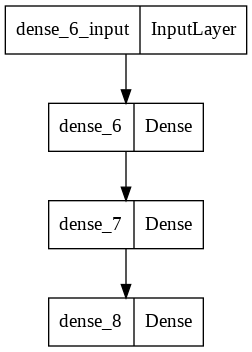

In [25]:
plot_model(model=model5)

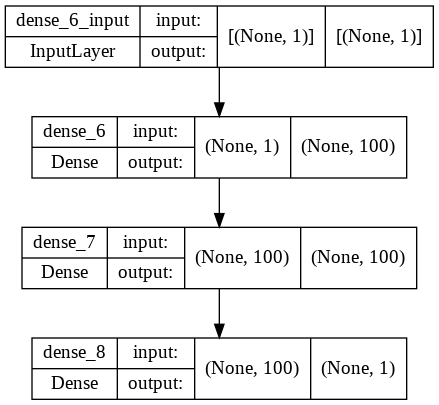

In [26]:
plot_model(model=model5, show_shapes=True)

# Visualizing our model predictions

In [27]:
# make some predictions

y_pred = model5.predict(X_test)
y_pred

array([[11.392484],
       [12.093077],
       [12.793668],
       [13.494261],
       [14.194855],
       [14.895447],
       [15.596038],
       [16.29663 ],
       [16.997225],
       [17.697817]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [29]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  '''
  Plots testing data, train data and predictions and compares them to ground truth labels
  '''
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  # plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predicted Data")
  plt.legend()

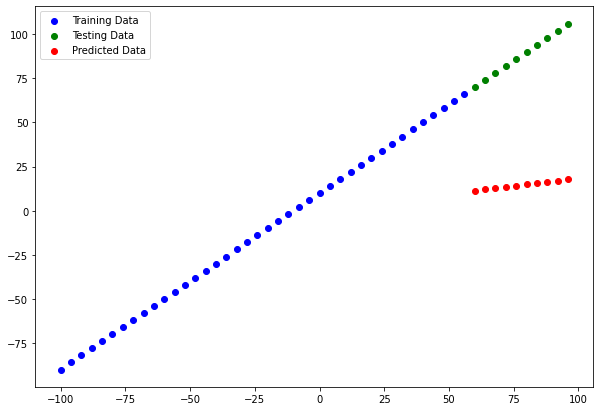

In [30]:
plot_predictions()

In [31]:
model5.evaluate(X_test, y_test)

1/1 [==============================] - 1s 692ms/step - loss: 73.4548 - mae: 73.4548


[73.45484924316406, 73.45484924316406]

In [32]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))

In [33]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([76.60751 , 75.90692 , 75.20633 , 74.50574 , 73.805145, 73.10455 ,
       72.40396 , 71.70337 , 71.00278 , 70.302185], dtype=float32)>

In [34]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[11.392484],
       [12.093077],
       [12.793668],
       [13.494261],
       [14.194855],
       [14.895447],
       [15.596038],
       [16.29663 ],
       [16.997225],
       [17.697817]], dtype=float32)>

In [35]:
y_pred

array([[11.392484],
       [12.093077],
       [12.793668],
       [13.494261],
       [14.194855],
       [14.895447],
       [15.596038],
       [16.29663 ],
       [16.997225],
       [17.697817]], dtype=float32)

In [36]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([11.392484, 12.093077, 12.793668, 13.494261, 14.194855, 14.895447,
       15.596038, 16.29663 , 16.997225, 17.697817], dtype=float32)>

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
y_test - y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[59, 63, 67, 71, 75, 79, 83, 87, 91, 95],
       [58, 62, 66, 70, 74, 78, 82, 86, 90, 94],
       [58, 62, 66, 70, 74, 78, 82, 86, 90, 94],
       [57, 61, 65, 69, 73, 77, 81, 85, 89, 93],
       [56, 60, 64, 68, 72, 76, 80, 84, 88, 92],
       [56, 60, 64, 68, 72, 76, 80, 84, 88, 92],
       [55, 59, 63, 67, 71, 75, 79, 83, 87, 91],
       [54, 58, 62, 66, 70, 74, 78, 82, 86, 90],
       [54, 58, 62, 66, 70, 74, 78, 82, 86, 90],
       [53, 57, 61, 65, 69, 73, 77, 81, 85, 89]], dtype=int32)>

In [39]:
error = tf.cast(y_test,dtype=tf.float32) - (tf.squeeze(y_pred))

In [40]:
sum(error)/len(error)

<tf.Tensor: shape=(), dtype=float32, numpy=73.45485>

In [41]:
tf.metrics.mean_squared_error(y_true=y_test, 
                              y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=5485.425>

In [42]:
# make some function to reuse MAE & MSE

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                      y_pred=y_pred)